In [1]:
import os
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [5]:
results_dir = os.path.join(os.pardir, "results")
program = "coloring"  # coloring, dijkstra_token_ring, maximal_matching, maximal_independent_set
analysis_type = "full"  # full, partial
graph_names = ["graph_1", "graph_2", "graph_3", "graph_4", "graph_5", "graph_6", "graph_7", "graph_8"]
plots_dir = os.path.join("plots", program, "node_vs_max_cvf_effect")

In [6]:
def get_df(graph_name):
    full_path = os.path.join(
        results_dir,
        program,
        f"rank_effect_by_node__{analysis_type}__{program}__{graph_name}.csv",
    )
    if not os.path.exists(full_path):
        print("File not found:", full_path)
        return None

    df = pd.read_csv(full_path)
    df["CVF (Avg)"] = df["CVF In (Avg)"] + df["CVF Out (Avg)"]
    # df["CVF (Max)"] = df["CVF In (Max)"] + df["CVF Out (Max)"]
    return df

In [7]:
def create_plots_dir_if_not_exists():
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)

create_plots_dir_if_not_exists()

In [19]:
def plot_node_vs_max_rank_effect(df, ax, y_max):
    sns.barplot(data=df, x="Node", y="Rank Effect", ax=ax)
    ax.set_ylim(bottom=0, top=y_max+1)

File not found: ../results/coloring/rank_effect_by_node__full__coloring__graph_3.csv
File not found: ../results/coloring/rank_effect_by_node__full__coloring__graph_4.csv
File not found: ../results/coloring/rank_effect_by_node__full__coloring__graph_5.csv
File not found: ../results/coloring/rank_effect_by_node__full__coloring__graph_8.csv


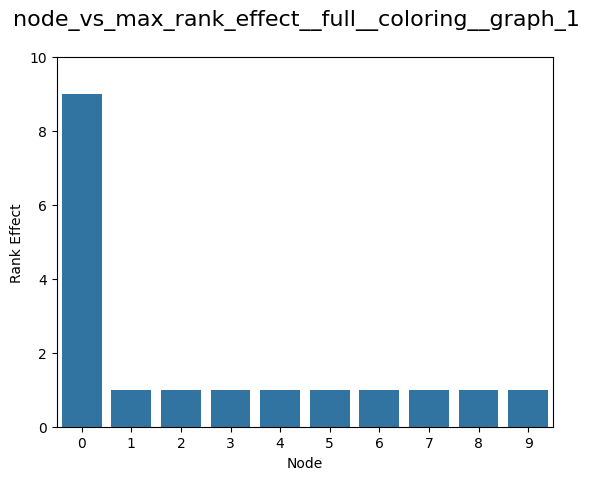

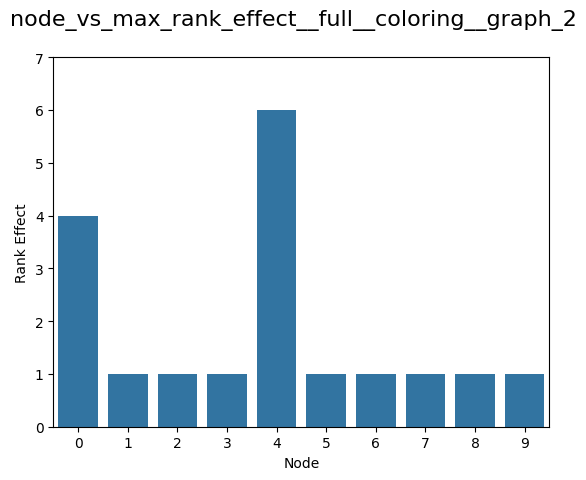

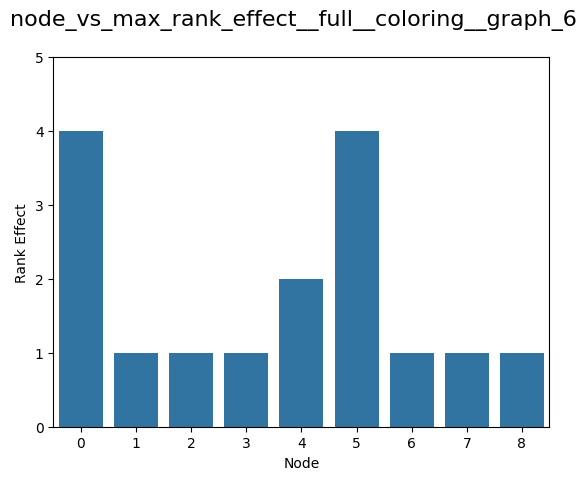

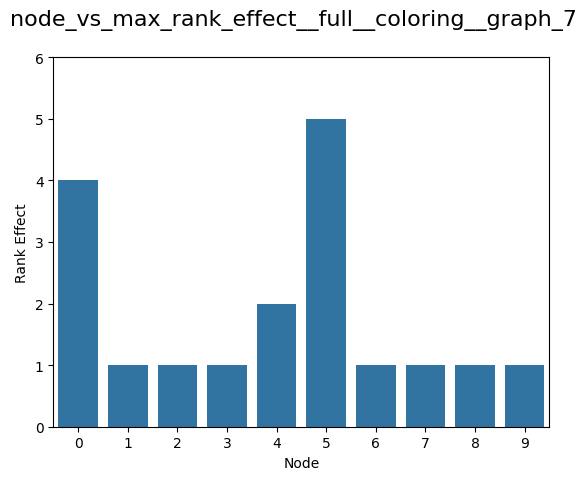

In [22]:
for graph_name in graph_names:
    df = get_df(graph_name)
    if df is None:
        continue
    node_vs_max_rank_effect = df[df['CVF (Avg)'] > 0].groupby(["Node"]).agg({"Rank Effect": ["max"]}).droplevel(1, axis=1) 
    fig, ax = plt.subplots(1)
    fig_title = f"node_vs_max_rank_effect__{analysis_type}__{program}__{graph_name}"
    fig.suptitle(fig_title, fontsize=16)
    plot_node_vs_max_rank_effect(node_vs_max_rank_effect, ax, node_vs_max_rank_effect['Rank Effect'].max())

In [21]:
node_vs_max_rank_effect['Rank Effect'].max()

np.int64(5)